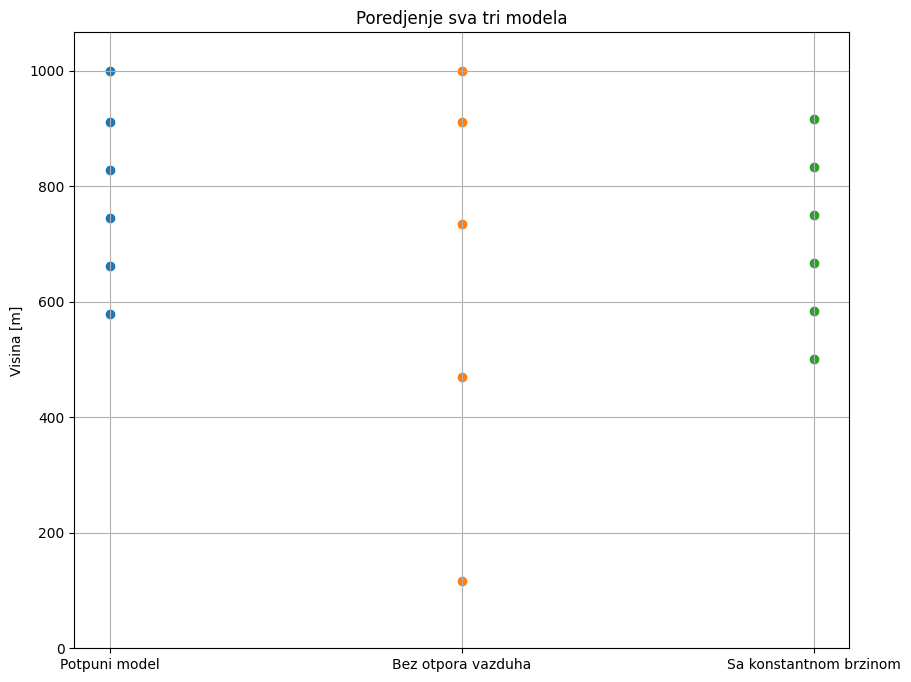

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

# BEZ OTPORA
g = 9.81   
m = 5.24e-7  #  masa kapljice
kv = 0  # NEMA OTPORA!

dt = 3

# pocetni uslovi
h = 1000 #m
v = 0
t = 20.0
n = int(round(t/dt))

H1 = []

for i in range(n-1):
    h += v * dt # staro v OJLEROVA METODA
    g += - (kv/m)*v # ovo ce uvek biti nula! tj g je const
    v -= g * dt # novo v

    H1.append(h)

# CONST BRZINA
kv = 1.85e-7
t = 20.0
n = int(round(t/dt))
v = 0
h = 1000

H2 = []
for i in range(n-1):
    h += v*dt
    v = -m*g/kv  # terminalna brzina
    # g += -(kv/m)*v
    # v -= g*dt

    H2.append(h)

# POTPUNI MODEL
v0 = 0.0
h = 1000
t = 20.0
n = int(round(t/dt))

v = []
a = []

v.append(v0)

H3 = []

for i in range(n-1):
    h += v[-1]*dt  
    a.append(-g - (kv/m)*v[-1])
    v.append(v[-1] + a[-1]*dt)

    H3.append(h)

plt.figure(figsize=(10, 8))

plt.scatter(np.ones_like(H3), H3)
plt.scatter(2*np.ones_like(H1), H1)
plt.scatter(3*np.ones_like(H2), H2)

plt.title('Poredjenje sva tri modela')
plt.ylabel('Visina [m]')
plt.ylim(0)
plt.xticks([1, 2, 3], ['Potpuni model', 'Bez otpora vazduha', 'Sa konstantnom brzinom'])
plt.grid(True)
plt.show()